# <u> <b> Understanding train and test  data </b> </u>

### The train-test split is a technique for evaluating the performance of a machine learning algorithm. It can be used for classification or regression problems and can be used for any supervised learning algorithm.

### The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

* ### <u>Train Dataset</u> : Used to fit the machine learning model.
* ### <u>Test Dataset</u> : Used to evaluate the fit machine learning model.

### The objective is to estimate the performance of the machine learning model on new data: data not used to train the model. This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

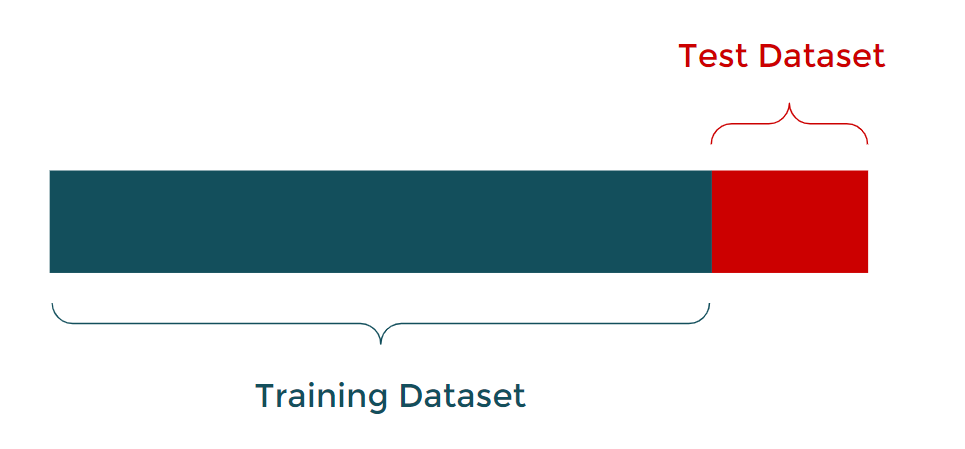

# <u><b> Understanding underfitting and overfitting </b></u>

### In machine learning and pattern recognition, there are many ways (an infinite number, really) of solving any one problem. Thus it is important to have an objective criterion for assessing the accuracy of candidate approaches and for selecting the right model for a data set at hand. We’ll discuss the concepts of under- and overfitting and how these phenomena are related to the statistical quantities bias and variance. Finally, we will discuss how these concepts can be applied to select a model that will accurately generalize to novel scenarios/data sets.

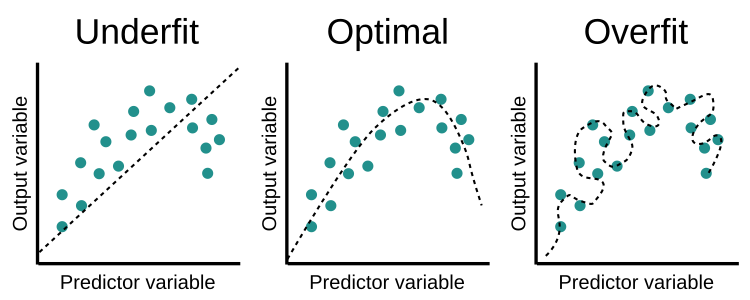

# <b> <u> Models for Regression </u> </b>

When performing regression analyses we would like to characterize how the value of some dependent variable changes as some independent variable $x$ is varied. For example, say we would like to characterize the firing rate of a neuron in visual cortex as we vary the orientation of a grating pattern presented to the eye. We assume that there is some true relationship function $f(x)$
 that maps the independent variable values (i.e. the angle of the grating pattern) onto the dependent variable values (i.e. firing rate). We would like to determine the form of the function $f(x)$ from observations of independent-dependent value pairs (we can also think of these as input-output pairs, as we can think of the function $f(x)$ taking $x$ as input and producing an output). However, in the real world, we don’t get to observe $f(x)$ directly, but instead get noisy observations $y$, where

$y = f(x) + ϵ$
 
Here we will assume that $ϵ$ is random variable distributed according to a zero-mean Gaussian with standard deviation $σ^{2}_{ϵ}$. Note that because 
$ϵ$ is a random variable, $y$ is also a random variable (with a mean that is conditioned on both $x$ and $f(x)$, and exhibiting a variance $σ^{2}_{ϵ}$.

As an example, say that the true function $f(x)$ we want to determine has the following form (though we don’t know it):

$f(x) = sin(πx)$

Thus the observations $y$, we get to see have the following distribution.

$ y = sin(πx) + N(0,σ^{2}_{ϵ}) $
Below we define the function $f(x)$ and display it, then draw a few observation samples $y$, and display them as well:

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

(-2.0, 2.0)

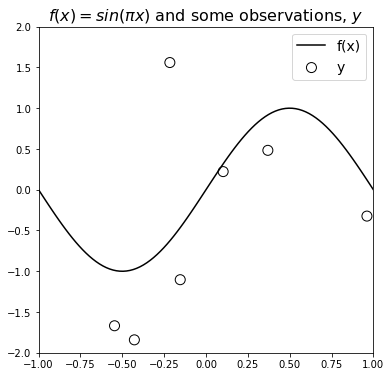

In [ ]:

np.random.seed(123)
MARKER_SIZE = 100
DATA_COLOR = 'black'
ERROR_COLOR = 'darkred'
POLYNOMIAL_FIT_COLORS = ['orange', 'royalblue', 'darkgreen']
LEGEND_FONTSIZE = 14
TITLE_FONTISIZE = 16
N_OBSERVATIONS = 10
NOISE_STD = 1.

x = 2 * (np.random.rand(N_OBSERVATIONS) - .5)
x_grid = np.linspace(-1, 1, 100)


def f(x):
    """Base function"""
    return np.sin(x * np.pi)


def sample_fx_data(shape, noise_std=NOISE_STD):
    return f(x) + np.random.randn(*shape) * noise_std


def plot_fx_data(y=None):
    """Plot f(x) and noisy samples"""
    y = y if y is not None else sample_fx_data(x.shape)
    fig, axs = plt.subplots(figsize=(6, 6))
    plt.plot(x_grid, f(x_grid), color=DATA_COLOR, label='f(x)')
    plt.scatter(x, y, s=MARKER_SIZE, edgecolor=DATA_COLOR, facecolors='none', label='y')


# Plot the data
y = sample_fx_data(x.shape)
plot_fx_data(y)
plt.legend(fontsize=14)
plt.title(f'$f(x) = sin(\pi x)$ and some observations, $y$', fontsize=16)
plt.xlim([-1, 1])
plt.ylim([-2, 2])

Our goal is to characterize the function $f(x)$, but we don’t know the function form of $f(x)$, we must instead estimate some other function $g(x)$ that we believe will provide an accurate approximation to $f(x)$. The function $g(x)$ is called an estimator of $f(x)$. In general, an estimator is some parameterized model that can capture a wide range of functional forms. One such class of estimators is the weighted combination of ordered polynomials:

$g_{D}(x)=θ_{0} + θ_{1}x + θ_{2}x^{2} + … + θ_{D}x^{D}$

As the polynomial order D increases, the functions $g_{D}(x)$ are able to capture increasingly complex behavior. For example, $g_{0}(x)$ desribes a horizontal line with an adjustable vertical offset $θ_{0}$,  $g_{1}(x)$ describes a line with adjustable vertical offset $θ_{0}$ and adjustable linear slope $θ_{1}$, $g_{2}(x)$ describes a function that also includes a weight on the quadratic term $θ_{2}$. We thus try to fit the values of the parameters for a given estimator $g_{D}(x)$ to best account for observed data in the hopes that we will also accurately approximate $f(x)$.

Below we estimate the parameters of three polynomial model functions of increasing complexity (using Numpy’s <code>polyfit</code>) to the sampled data displayed above. Specifically, we estimate the functions $g_{1}(x)$ , $g_{3}(x)$ and $g_{10}(x)$ 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
x

array([ 0.39293837, -0.42772133, -0.54629709,  0.10262954,  0.43893794,
       -0.15378708,  0.9615284 ,  0.36965948, -0.0381362 , -0.21576496])

In [ ]:
y

array([ 2.20990384, -1.84107056, -1.66832743,  0.22215401,  2.4730462 ,
       -1.10346083, -0.32341389,  0.48297796,  2.0864081 ,  1.55966971])

Text(0.5, 1.0, 'Various Polynomial Functions Fit to Observations')

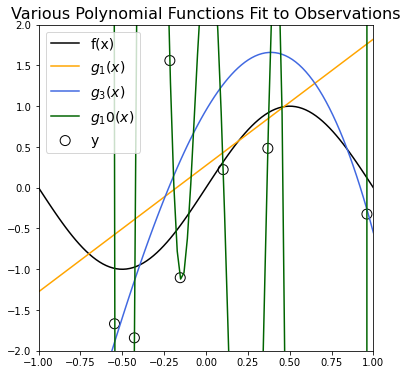

In [ ]:
plot_fx_data(y)

polynomial_degrees = [1, 3, 10]
theta = {}
fit = {}
for ii, degree in enumerate(polynomial_degrees):
    # Note: we should get an overconditioned warning for degree 10 because of extreme overfitting
    theta[degree] = np.polyfit(x, y, degree)
    fit[degree] = np.polyval(theta[degree], x_grid)
    # plt.figure(figsize=(10,10)) 
    plt.plot(x_grid, fit[degree], POLYNOMIAL_FIT_COLORS[ii], label=f"$g_{degree}(x)$")
    
plt.legend(fontsize=LEGEND_FONTSIZE)
plt.xlim([-1, 1])
plt.ylim([-2, 2])
plt.title("Various Polynomial Functions Fit to Observations", fontsize=TITLE_FONTISIZE)

In [ ]:
fit

{1: array([-1.2767972 , -1.24549209, -1.21418698, -1.18288187, -1.15157676,
        -1.12027165, -1.08896653, -1.05766142, -1.02635631, -0.9950512 ,
        -0.96374609, -0.93244098, -0.90113587, -0.86983075, -0.83852564,
        -0.80722053, -0.77591542, -0.74461031, -0.7133052 , -0.68200009,
        -0.65069498, -0.61938986, -0.58808475, -0.55677964, -0.52547453,
        -0.49416942, -0.46286431, -0.4315592 , -0.40025408, -0.36894897,
        -0.33764386, -0.30633875, -0.27503364, -0.24372853, -0.21242342,
        -0.1811183 , -0.14981319, -0.11850808, -0.08720297, -0.05589786,
        -0.02459275,  0.00671236,  0.03801748,  0.06932259,  0.1006277 ,
         0.13193281,  0.16323792,  0.19454303,  0.22584814,  0.25715325,
         0.28845837,  0.31976348,  0.35106859,  0.3823737 ,  0.41367881,
         0.44498392,  0.47628903,  0.50759415,  0.53889926,  0.57020437,
         0.60150948,  0.63281459,  0.6641197 ,  0.69542481,  0.72672993,
         0.75803504,  0.78934015,  0.82064526,  

Qualitatively, we see that the estimator $g_{1}(x)$(orange line) provides a poor fit to the observed data, as well as a poor approximation to the function 
$f(x)$ (black curve). We see that the estimator $g_{10}(x)$ (green curve) provides a very accurate fit to the data points, but varies wildly to do so, and therefore provides an inaccurate approximation of $f(x)$. Finally, we see that the estimator $g_{3}(x)$(blue curve) provides a fairly good fit to the observed data, and a much better job at approximating $f(x)$.

Our original goal was to approximate $f(x)$, not the data points per se. Therefore $g_{3}(x)$, at least qualitatively, provides a more desirable estimate of $f(x)$ than the other two estimators. The fits for $g_{1}(x)$ and 
$g_{10}(x)$ are examples of “underfitting” and “overfitting” to the observed data, respectively:

* Underfitting occurs when an estimator $g(x)$ is not flexible enough to capture the underlying trends in the observed data. 

* Overfitting occurs when an estimator is too flexible, allowing it to capture illusory trends in the data. These illusory trends are often the result of the noise in the observations $y$.

## <b>Bias and Variance of an Estimator </b>

The model fits for $g_{D}(x)$ discussed above were based on a single, randomly-sampled data set of observations $y$. However, because $ϵ$ is a random variable, there are in principle a potentially infinite number of ranndom data sets that can be observed. In order to determine a good model of $f(x)$, it would be helpful to have an idea of how an estimator will perform on any or all of these potential datasets. To get an idea of how each of the estimators discussed above performs in general we can repeat the model fitting procedure for many data sets.

Here we perform such an analyses, sampling $50$ independent data sets, then fitting the parameters for the polynomial functions of model order $ D =(1,3,10) $ to each dataset.

Text(0.5, 0.98, 'Model Fits Given Random Samples Around f(x)')

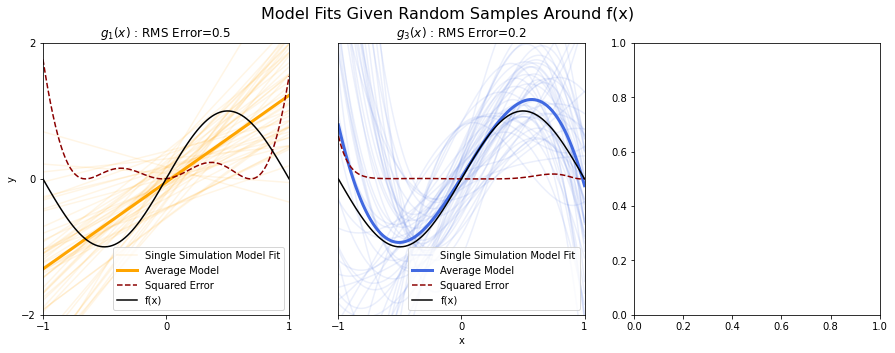

In [ ]:
from collections import defaultdict

n_simulations = 50
simulation_fits = defaultdict(list)
for sim in range(n_simulations):
    # Start from same samples
    y_simulation = sample_fx_data(x.shape)
    for degree in polynomial_degrees[:-1]:
        # Note: we should get an overconditioned warning
        # for degree 10 because of extreme overfitting
        theta_tmp = np.polyfit(x, y_simulation, degree)
        simulation_fits[degree].append(np.polyval(theta_tmp, x_grid))


def error_function(pred, actual):
    return (pred - actual) ** 2


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ii, degree in enumerate(polynomial_degrees[:-1]):
    plt.sca(axs[ii])
    for jj, fit in enumerate(simulation_fits[degree]):
        label = 'Single Simulation Model Fit' if jj == 0 else None
        plt.plot(x_grid, fit, color=POLYNOMIAL_FIT_COLORS[ii], alpha=.1, label=label)

    average_fit = np.array(simulation_fits[degree]).mean(0)
    squared_error = error_function(average_fit, f(x_grid)) 
    rms = np.sqrt(np.mean(squared_error))
    plt.plot(x_grid, average_fit, color=POLYNOMIAL_FIT_COLORS[ii], linewidth=3, label='Average Model')
    plt.plot(x_grid, squared_error, '--', color=ERROR_COLOR, label='Squared Error')
    plt.plot(x_grid, f(x_grid), color='black', label='f(x)')
    plt.yticks([])
    if ii == 1:
        plt.xlabel('x')
    elif ii == 0:
        plt.ylabel('y')
        plt.yticks([-2, 0, 2])

    plt.xlim([-1, 1])
    plt.ylim([-2, 2])
    plt.xticks([-1, 0, 1])
    plt.title(f"$g_{degree}(x)$ : RMS Error={np.round(rms, 1)}")
    plt.legend(loc='lower right')
plt.suptitle('Model Fits Given Random Samples Around f(x)', fontsize=TITLE_FONTISIZE)

The lightly-colored curves in each of the three plots above are an individual polynomial model fit to one of the 50 sampled data sets. The darkly-colored curve in each plot is the average over the 50 individual fits. The dark curve is the true, underlying function $f(x)$.

# <u><b>Estimator Bias</u></b>

We see that for the estimator $g_{1}(x)$(light orange curves), model fits do not vary too dramatically from data set to data set. Thus the averaged estimator fit over all the data sets (dark orange curve), formally written as 
$E[g(x)]$, is similar (in terms of slope and vertical offset) to each of the individual fits.

A commonly-used statistical metric that tries to assess the average accuracy of an estimator $g(x)$ at approximating a target function $f(x)$ is what is called the bias of the estimator. Formally defined as:

$ bias = E[g(x)] −f(x)$

The bias describes how much the average estimator fit over many datasets $E[g(x)]$ deviates from the value of the actual underlying target function $f(x)$.

We can see from the plot for $g_{1}(x)$ that $E[g_{1}(x)]$ deviates significantly from $f(x)$. Thus we can say that the estimator $g_{1}(x)$ exhibits large bias when approximating the function $f(x)$.

When averaging over the individual fits for the estimator $g_{3}(x)$ (blue curves), we find that the average estimator $E[g_{3}(x)$(dark blue curve) accurately approximates the true function $f(x)$, indicating that the estimator 
$g_{3}(x)$ has low bias.

# <u><b>Estimator Variance</b></u>

Another common statistical metric attempts to capture the average consistency of an estimator when fit to multiple datasets. This metric, referred to as the variance of the estimator is formally defined as
variance = $E[(g(x) − E[g(x)])^{2}]$

The variance is the expected (i.e. average) squared difference between any single dataset-dependent estimate of $g(x)$ and the average value of $g(x)$
 estimated over all datasets, $E[g(x)]$

According to the definition of variance, we can say that the estimator $g_{1}(x)$ exhibits low variance because the each individual $g_{1}(x)$ is fairly similar across datasets.

Investigating the results for the estimator $g_{10}(x)$ (green curves), we see that each individual model fit varies dramatically from one data set to another. Thus we can say that this estimator exhibits high variance.

We established earlier that the estimator $g_{3}(x)$ provided a qualitatively better fit to the function $f(x)$ than the other two polynomial estimators for a single dataset. It appears that this is also the case over many datasets. We also find that estimator $g_{3}(x)$ exhibits low bias and low variance, whereas the other two, less-desirable estimators, have either high bias or high variance. Thus it would appear that having both low bias and low variance is a reasonable criterion for selecting an accurate model of $f(x)$.


# <b><u>Expected Prediction Error and the Bias-variance Tradeoff</u></b>
For a given estimator $g(x)$ fit to a data set of $x-y$ pairs , we would like to know, given all the possible datasets out there, what is the expected prediction error we will observe for a new data point $x^*$, $y^* = f(x)+ ϵ$. If we define prediction error to be the squared difference in model prediction $g(x^*)$ and observations $y^*$, the expected prediction error is then:

$E[(g(x^*)−y^*)2]$ = $E[(g(x^*) - E[g(x^*))^{2}]$  + $(E[(g(x^*)]  - f(x^*))^{2}$+ $E[(y^* - f(x^*))^2]$

## $Error = Variance + Bias^{2} + Irreducible \ error$

* The first term is the variance of the estimator introduced above.
* The second term is the squared bias of the estimator, also introduced above.
* The third term is the variance of the observation noise and describes how much the observations $y$ vary from the true function $f(x)$. Notice that the noise term does not depend on the estimator $g(x)$. This means that the noise term is a constant that places a lower bound on expected prediction error, and in particular is equal to the variance the noise term $σ^{2}_{ϵ}$


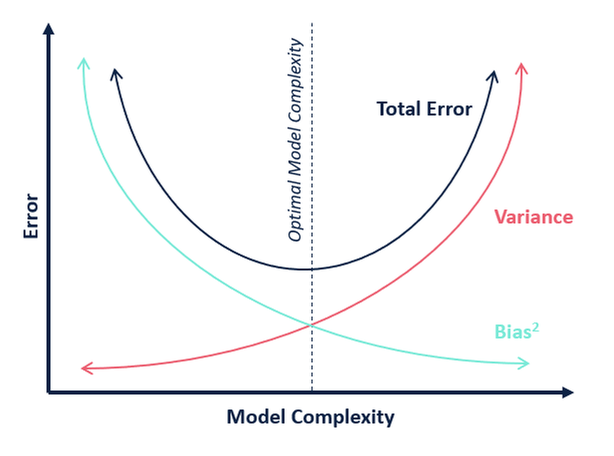

# <b><u>Demonstration of the Bias-variance Tradeoff </u></b>

Below we demonstrate the findings presented above with another set of simulations. We simulate 100 independent datasets, each with 25 $x-y$ pairs; the samples $y$ have a noise variance = 0.25. We then partition each dataset into two non-overlapping sets:

* a Training Set using for fitting model parameters
* a Testing Set used to estimate the model prediction error

We then fit the parameters for estimators of varying complexity. Complexity is varied by using polynomial functions that range in model order from 1 (least complex) to 12 (most complex). We then calculate and display the squared bias, variance, and prediction error on testing set for each of the estimators:

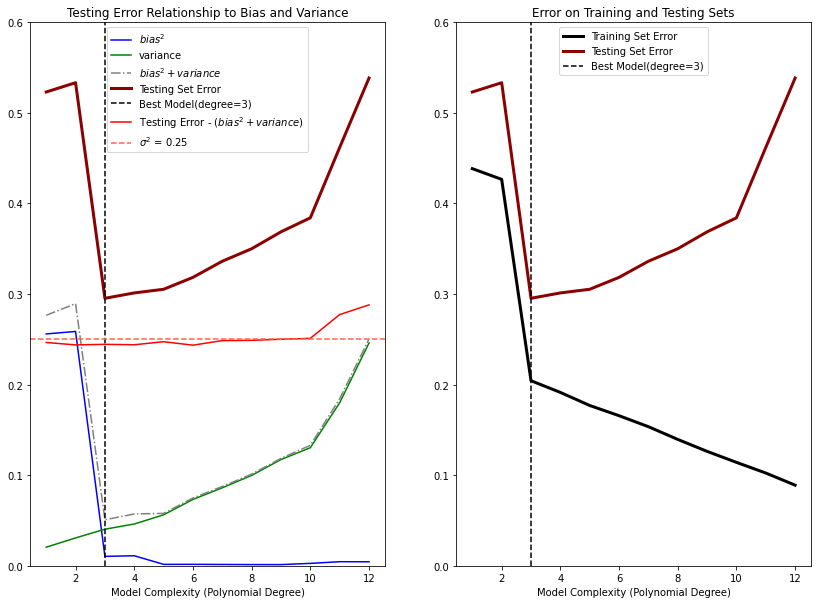

In [ ]:
np.random.seed(124)
n_observations_per_dataset = 25
n_datasets = 100
max_poly_degree = 12  # Maximum model complexity
model_poly_degrees = range(1, max_poly_degree + 1)

NOISE_STD = .5
percent_train = .8
n_train = int(np.ceil(n_observations_per_dataset * percent_train))

# Create training/testing inputs
x = np.linspace(-1, 1, n_observations_per_dataset)
# x = np.random.permutation(x)
x_train = x[:n_train]
x_test = x[n_train:]

# logging variables
theta_hat = defaultdict(list)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

# Loop over datasets
for dataset in range(n_datasets):

    # Simulate training/testing targets
    y_train = f(x_train) + NOISE_STD * np.random.randn(x_train.shape[0])
    y_test = f(x_test) + NOISE_STD * np.random.randn(x_test.shape[0])

    # Loop over model complexities
    for degree in model_poly_degrees:
        # Train model
        tmp_theta_hat = np.polyfit(x_train, y_train, degree)

        # Make predictions on train set
        tmp_pred_train = np.polyval(tmp_theta_hat, x_train)
        pred_train[degree].append(tmp_pred_train)

        # Test predictions
        tmp_pred_test = np.polyval(tmp_theta_hat, x_test)
        pred_test[degree].append(tmp_pred_test)

        # Mean Squared Error for train and test sets
        train_errors[degree].append(np.mean(error_function(tmp_pred_train, y_train)))
        test_errors[degree].append(np.mean(error_function(tmp_pred_test, y_test)))


def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(x_test)) ** 2)


def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)


complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]


# Visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

## Plot Bias^2 + variance
plt.sca(axs[0])
plt.plot(model_poly_degrees, bias_squared, color='blue', label='$bias^{2}$')
plt.plot(model_poly_degrees, variance, color='green', label='variance')
plt.plot(model_poly_degrees, np.array(bias_squared) + np.array(variance),  linestyle='-.', color='gray', label='$bias^{2} + variance$')
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.plot(model_poly_degrees, np.array(complexity_test_error) - (np.array(bias_squared) + np.array(variance)), color='red', label='Testing Error - ($bias^{2} + variance$)')
plt.axhline(NOISE_STD **2, color='tomato', linestyle='--', label=f'$\sigma^{2}$ = {round(NOISE_STD**2, 3)}')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylim([0, .6]);
plt.legend()
plt.title('Testing Error Relationship to Bias and Variance')

## Plot Train / Test Set Error
plt.sca(axs[1])
plt.plot(model_poly_degrees, complexity_train_error, label='Training Set Error', linewidth=3, color=DATA_COLOR)
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.ylim([0, .6]);
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.title('Error on Training and Testing Sets')
plt.legend(loc='upper center')

In [ ]:
pred_test[1]

[array([-0.22224463, -0.60276703, -0.33096532,  0.21263811,  0.04955709]),
 array([-1.09751955e-04, -3.57132458e-01, -1.02116239e-01,  4.07916198e-01,
         2.54906466e-01]),
 array([-0.16037779, -0.61805712, -0.29114331,  0.36268431,  0.16653602]),
 array([-0.01102109, -0.38888764, -0.11898296,  0.42082639,  0.25888358]),
 array([-0.12534525, -0.57740259, -0.25450449,  0.39129172,  0.19755285]),
 array([-0.12676956, -0.59589296, -0.26080482,  0.40937146,  0.20831858]),
 array([-0.05905671, -0.38774513, -0.15296769,  0.31658721,  0.17572074]),
 array([-0.16740947, -0.45854596, -0.25059133,  0.16531794,  0.04054516]),
 array([ 0.01612709, -0.36895333, -0.09389589,  0.45621899,  0.29118452]),
 array([-0.10937607, -0.34549052, -0.17683734,  0.16046902,  0.05927711]),
 array([ 0.02015491, -0.32145802, -0.07744878,  0.41056969,  0.26416415]),
 array([-0.18313135, -0.63222703, -0.3114444 ,  0.33012087,  0.13765129]),
 array([-0.17111629, -0.56872072, -0.28471756,  0.28328877,  0.11288687]

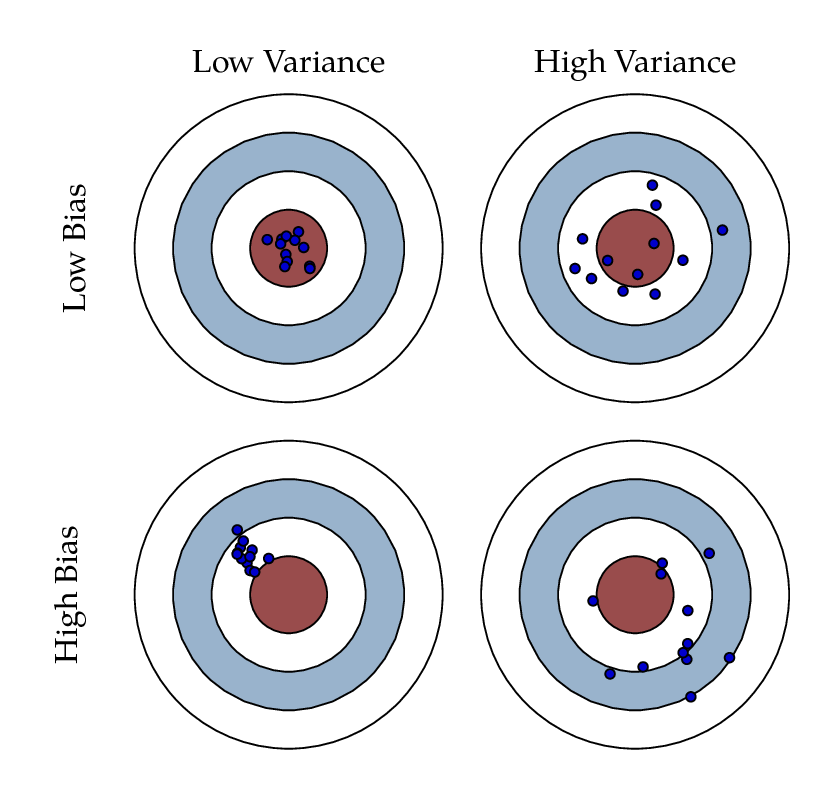

### We discussed how the bias and variance of an estimator are related to squared prediction error on the testing set. Though we focused on regression, these concepts can also be applied to classification problems. We found that an optimal estimator will have both low variance and low bias. We further found that information about squared bias and variance is contained in expected prediction error calculated on a testing set of data not used to fit a model’s parameters.

### The concepts of estimator bias and variance are generally only clear in the context of an ensemble of datasets. However, in real-world applications, there is generally only a single observed dataset. In such cases the roles of bias and variance are less obvious (though, it is possible to calculate estimates of variance and bias using resampling methods such as bootstrapping).

### However, the direct connection we made between bias, variance with the mean-squared error calculated on a testing set give us a direct means for assessing a group of candidate estimators in light of a single data set. We only need to partition the available data set into a Training Set used to fit model parameters and a Testing Set used to assess prediction accuracy.

### Comparing prediction accuracy across potential estimators is equivalent to assessing biases and variances of the estimators across many datasets. Note that resampling methods such as cross-validation can prove helpful here, particularly when the amount of observed data is small.